# 11. Visualization with Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Table of Contents

1. The plot Method
2. Modifying Plot Aesthetics with Templates
3. Bar Charts
4. Pie Charts



## 1. The plot Method

- By default, the `plot` method renders a line chart, which is ideal for showing trends over time.
- The `plot` method includes all numeric **DataFrame** columns by default. We can choose a subset with the `y` parameter.
- Matplotlib will use the index values for the x-axis and the values for the y-axis.
- Matplotlib will figure out reasonable intervals for the date index (days, months, years, etc.). These options are all customizable.

In [2]:
# Load IBM stock share dataset
ibm = pd.read_csv("ibm.csv", parse_dates = ["Date"], index_col = "Date")
ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.063095,129.942642,128.843216,129.464630,105.346336,3293436
2020-01-03,127.695984,128.929260,127.686424,128.432129,104.506195,2482890
2020-01-06,127.552582,128.336517,127.342255,128.202682,104.319489,2537073
2020-01-07,127.810707,129.024857,127.533463,128.288712,104.389488,3232977
2020-01-08,128.594650,129.885284,128.030594,129.359467,105.260765,4545916


<Axes: xlabel='Date'>

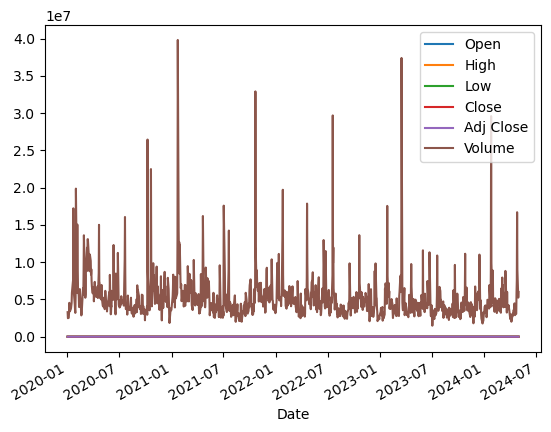

In [3]:
ibm.plot() # a valid line chart, but Matplotlib includes all columns by default
# as we can see the values for Volume are so high that they dwarf all other values
# which get reduced to a line at value 0

<Axes: xlabel='Date'>

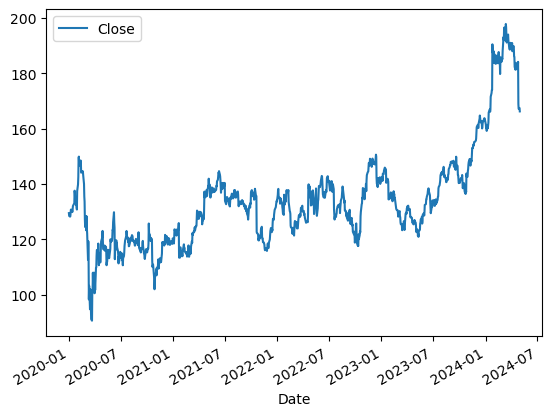

In [4]:
# therefore, select columns to include as y-axis
ibm.plot(y="Close")
# this makes more sense; Matplotlib uses index as values on axes
# everything is customizable: interval between values on axis, color, ...

## 2. Modifying Plot Aesthetics with Templates

- The `plt.style.available` attribute returns a list of available styles.
- Use the `plt.style.use` method and pass in a sample style string.
- The next charts/graphs you render will implement that style.

In [5]:
# Load dataset
ibm = pd.read_csv("ibm.csv", parse_dates = ["Date"], index_col = "Date")
ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.063095,129.942642,128.843216,129.464630,105.346336,3293436
2020-01-03,127.695984,128.929260,127.686424,128.432129,104.506195,2482890
2020-01-06,127.552582,128.336517,127.342255,128.202682,104.319489,2537073
2020-01-07,127.810707,129.024857,127.533463,128.288712,104.389488,3232977
2020-01-08,128.594650,129.885284,128.030594,129.359467,105.260765,4545916


In [6]:
# use pyplot
plt.style.available # opens a list of strings & each string represents a preconfigured color template/theme

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='Date'>

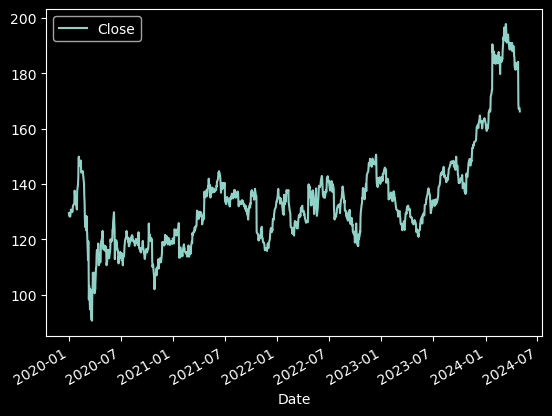

In [7]:
# we will pick color theme "dark_background" as an example
plt.style.use("dark_background") # set the global theme for all subsequent Matplotlib graphs
ibm.plot(y="Close")

## 3. Bar Charts

- A bar chart uses bars to represent occurrences of values/categories.
- We can customize the type of plot that Matplotlib renders with the `kind` parameter.
- Pass `bar` for a bar graph and `barh` for a horizontal bar graph.

In [8]:
# Load dataset
ibm = pd.read_csv("ibm.csv", parse_dates = ["Date"], index_col = "Date")
ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.063095,129.942642,128.843216,129.464630,105.346336,3293436
2020-01-03,127.695984,128.929260,127.686424,128.432129,104.506195,2482890
2020-01-06,127.552582,128.336517,127.342255,128.202682,104.319489,2537073
2020-01-07,127.810707,129.024857,127.533463,128.288712,104.389488,3232977
2020-01-08,128.594650,129.885284,128.030594,129.359467,105.260765,4545916


In [9]:
# categorize stock_price values in 3 categories with apply() method

def rank_performance(stock_price):
    if stock_price <= 120:
        return "Poor"
    elif stock_price > 120 and stock_price <= 160:
        return "Satisfactory"
    else:
        return "Excellent"

ibm["Close"].apply(rank_performance).value_counts() # count number of stock_prices in each category

Close
Satisfactory    761
Poor            226
Excellent       102
Name: count, dtype: int64

<Axes: xlabel='Close'>

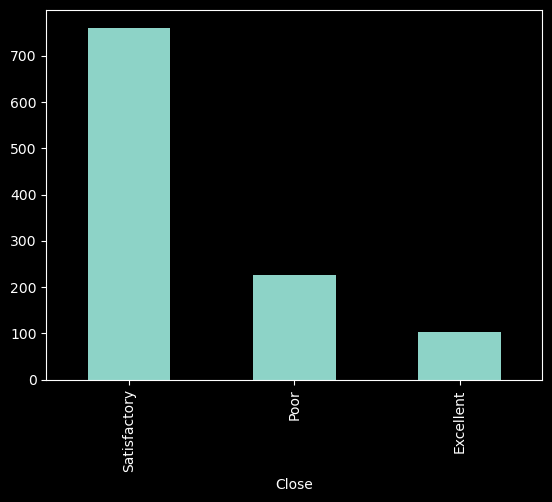

In [10]:
ibm["Close"].apply(rank_performance).value_counts().plot(kind="bar")

<Axes: ylabel='Close'>

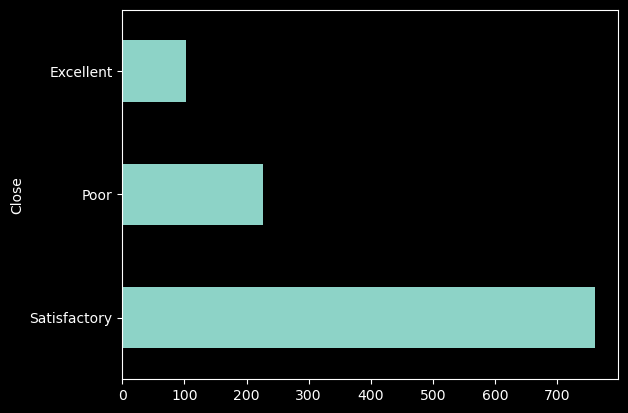

In [11]:
ibm["Close"].apply(rank_performance).value_counts().plot(kind="barh")

## 4. Pie Charts

- A pie chart uses a circle to represent proportions (how much each chunk contributes to the whole).
- Pass the `kind` parameter an argument of `"pie"`.
- The `legend` parameter renders a legend to map colors to labels.


In [12]:
# Load dataset
ibm = pd.read_csv("ibm.csv", parse_dates = ["Date"], index_col = "Date")
ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.063095,129.942642,128.843216,129.464630,105.346336,3293436
2020-01-03,127.695984,128.929260,127.686424,128.432129,104.506195,2482890
2020-01-06,127.552582,128.336517,127.342255,128.202682,104.319489,2537073
2020-01-07,127.810707,129.024857,127.533463,128.288712,104.389488,3232977
2020-01-08,128.594650,129.885284,128.030594,129.359467,105.260765,4545916


In [13]:
average_stock_price = ibm["Close"].mean()

<Axes: ylabel='count'>

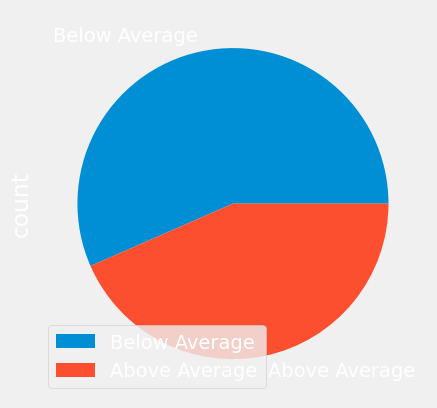

In [14]:
def rank_performance(stock_price):
    if stock_price >= average_stock_price:
        return "Above Average"
    return "Below Average"

plt.style.use("fivethirtyeight")
ibm["Close"].apply(rank_performance).value_counts().plot(kind="pie", legend=True)